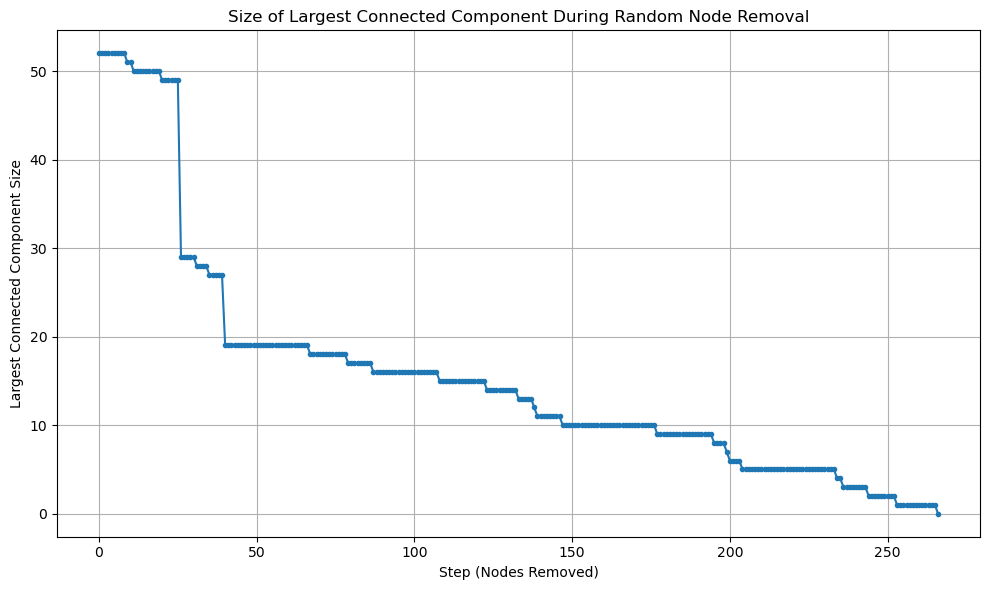

In [10]:
import networkx as nx
import csv
import random
import matplotlib.pyplot as plt

# Path to your edge list CSV
edge_list_file = 'C:/Users/ak4086/Desktop/H-W Uni/bri_new_wos_coauthorship_edgelist.csv'

# Build graph
G = nx.Graph()
with open(edge_list_file, 'r', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader, None)  # skip header if present
    for row in reader:
        if len(row) >= 2:  # make sure row has at least two columns
            source, target = row[0], row[1]
            G.add_edge(source, target)

removed_nodes = []
connected_components_sizes = []

# Initial largest connected component
largest_cc = max(nx.connected_components(G), key=len, default=set())
connected_components_sizes.append(len(largest_cc))

# Remove nodes randomly until graph is empty
while G.number_of_nodes() > 0:
    node_to_remove = random.choice(tuple(G.nodes()))
    G.remove_node(node_to_remove)
    removed_nodes.append(node_to_remove)

    largest_cc = max(nx.connected_components(G), key=len, default=set())
    connected_components_sizes.append(len(largest_cc))

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(range(len(connected_components_sizes)), connected_components_sizes,
         marker='o', linestyle='-', markersize=3)
plt.title("Size of Largest Connected Component During Random Node Removal")
plt.xlabel("Step (Nodes Removed)")
plt.ylabel("Largest Connected Component Size")
plt.grid(True)
plt.tight_layout()

# Save as image
plt.savefig("largest_cc_removal.png", dpi=300)
plt.show()